In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [45]:
def load_graph(path):
    data = torch.load(path)
    return data.x, data.edge_index

def get_graph_stats(node_features, edge_index):
    # Get number of nodes
    num_nodes = node_features.shape[0]
    # Get number of edges
    if len(edge_index.shape) == 2:
        num_edges = edge_index.shape[1]
    else:
        num_edges = 0
    # Get number of features
    num_features = node_features.shape[1]
    # Get average degree
    if len(edge_index.shape) == 2:
        avg_degree = np.mean([len(np.where(edge_index[0] == i)[0]) for i in range(num_nodes)])
    else:
        avg_degree = 0
    return num_nodes, num_edges, num_features, avg_degree

In [46]:
from tqdm import tqdm

graphs_path_train = "./data/preprocessed/distilbert-base-uncased/train"
graphs_path_val = "./data/preprocessed/distilbert-base-uncased/val"

graphs_train = os.listdir(graphs_path_train)
graphs_val = os.listdir(graphs_path_val)

num_nodes_train = []
num_edges_train = []
num_features_train = []
avg_degree_train = []
num_nodes_val = []
num_edges_val = []
num_features_val = []
avg_degree_val = []

for graph in tqdm(graphs_train):
    node_features, edge_index = load_graph(os.path.join(graphs_path_train, graph))
    num_nodes, num_edges, num_features, avg_degree, directed = get_graph_stats(node_features.numpy(), edge_index.numpy())
    num_nodes_train.append(num_nodes)
    num_edges_train.append(num_edges)
    num_features_train.append(num_features)
    avg_degree_train.append(avg_degree)

for graph in tqdm(graphs_val):
    node_features, edge_index = load_graph(os.path.join(graphs_path_val, graph))
    num_nodes, num_edges, num_features, avg_degree, directed = get_graph_stats(node_features.numpy(), edge_index.numpy())
    num_nodes_val.append(num_nodes)
    num_edges_val.append(num_edges)
    num_features_val.append(num_features)
    avg_degree_val.append(avg_degree)

  0%|          | 0/26408 [00:00<?, ?it/s]

100%|██████████| 3301/3301 [00:33<00:00, 97.39it/s] 


In [47]:
dp = pd.DataFrame({
    "num_nodes": num_nodes_train + num_nodes_val,
    "num_edges": num_edges_train + num_edges_val,
    "num_features": num_features_train + num_features_val,
    "avg_degree": avg_degree_train + avg_degree_val,
    "split": ["train"] * len(num_nodes_train) + ["val"] * len(num_nodes_val)
})

In [48]:
dp

,num_nodes,num_edges,num_features,avg_degree,directed,split
0,14,26,300,1.857143,True,train
1,10,20,300,2.000000,True,train
2,29,64,300,2.206897,True,train
3,30,66,300,2.200000,True,train
4,30,66,300,2.200000,True,train
...,...,...,...,...,...,...
29704,43,94,300,2.186047,True,val
29705,65,142,300,2.184615,True,val
29706,20,44,300,2.200000,True,val
29707,26,52,300,2.000000,True,val


In [50]:
dp.describe()

,num_nodes,num_edges,num_features,avg_degree
count,29709.000000,29709.000000,29709.0,29709.000000
mean,32.283820,67.174526,300.0,2.033524
std,29.321384,62.737689,0.0,0.217208
min,1.000000,0.000000,300.0,0.000000
25%,16.000000,32.000000,300.0,1.965517
50%,25.000000,52.000000,300.0,2.067797
75%,38.000000,80.000000,300.0,2.153846
max,574.000000,1284.000000,300.0,2.500000


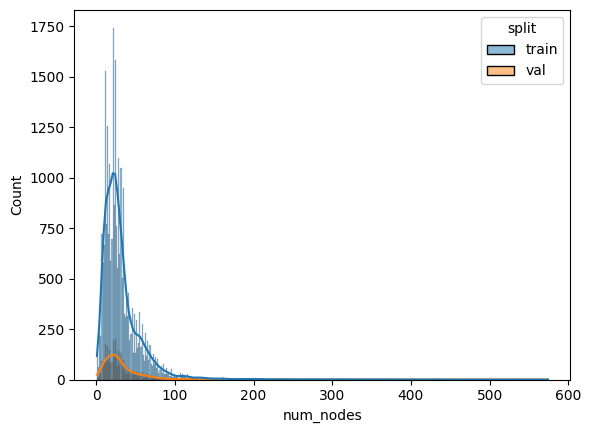

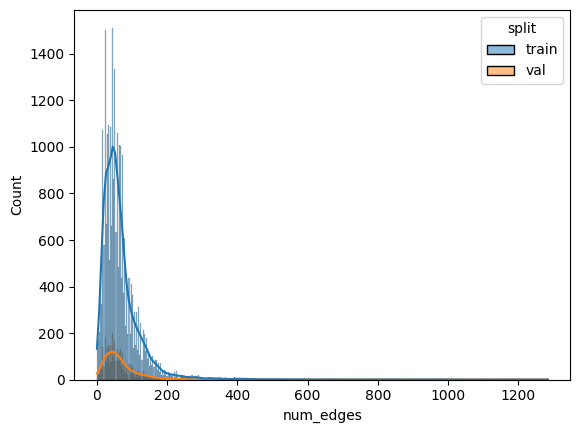

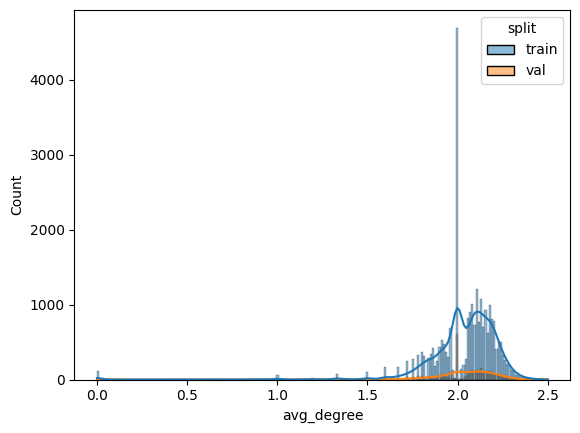

In [52]:
# histogram of number of nodes
sns.histplot(data=dp, x="num_nodes", hue="split", kde=True)
plt.savefig("num_nodes.png", dpi=300)
plt.show()

# histogram of number of edges
sns.histplot(data=dp, x="num_edges", hue="split", kde=True)
plt.savefig("num_edges.png", dpi=300)
plt.show()

# histogram of average degree
sns.histplot(data=dp, x="avg_degree", hue="split", kde=True)
plt.savefig("avg_degree.png", dpi=300)
plt.show()